<a href="https://colab.research.google.com/github/mauricio-gomez-py/Investigacion-de-Tesis-Pregrado/blob/main/analisis_modelos_heterogeneidad_de_weibull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

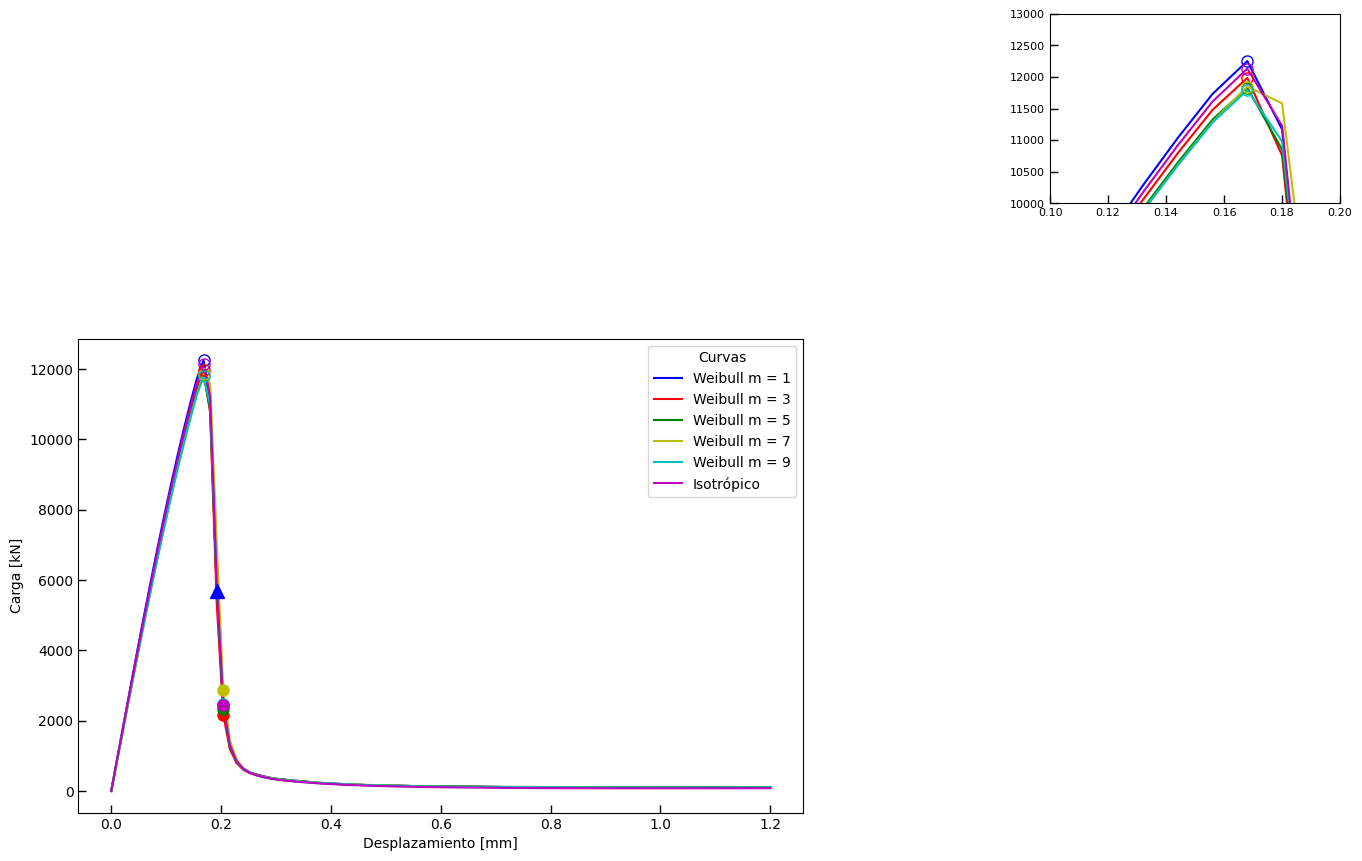

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Lee los archivos Excel
df_m1 = pd.read_excel('/content/database_iso_weibull_m1.xlsx')
df_m3 = pd.read_excel('/content/database_iso_weibull_m3.xlsx')
df_m5 = pd.read_excel('/content/database_iso_weibull_m5.xlsx')
df_m7 = pd.read_excel('/content/database_iso_weibull_m7.xlsx')
df_m9 = pd.read_excel('/content/database_iso_weibull_m9.xlsx')
df_isotropico = pd.read_excel('/content/database_iso_final_homogeneo.xlsx')

# Crear la figura principal
fig, ax = plt.subplots(figsize=(10, 6))

# Definir colores y etiquetas
colors = ['b', 'r', 'g', 'y', 'c', 'm']
dfs = [df_m1, df_m3, df_m5, df_m7, df_m9, df_isotropico]
labels = ['Weibull m = 1', 'Weibull m = 3', 'Weibull m = 5', 'Weibull m = 7', 'Weibull m = 9', 'Isotrópico']

# Graficar cada curva en el gráfico principal
for df, color, label in zip(dfs, colors, labels):
    ax.plot(df['Displacement (mm)'], df['Load (kN), Reaction force, x-component'], linestyle='-', color=color, label=label)

# Agregar marcador sin relleno en el desplazamiento 0.168 mm
x_marker_168 = 0.168
for df, color in zip(dfs, colors):
    index = df['Displacement (mm)'].sub(x_marker_168).abs().idxmin()
    ax.plot(df['Displacement (mm)'][index], df['Load (kN), Reaction force, x-component'][index],
            marker='o', markersize=8, fillstyle='none', markeredgecolor=color, label=None)

# Agregar marcador relleno en el desplazamiento 0.204 mm
x_marker_204 = 0.204
for df, color in zip(dfs, colors):
    index = df['Displacement (mm)'].sub(x_marker_204).abs().idxmin()
    ax.plot(df['Displacement (mm)'][index], df['Load (kN), Reaction force, x-component'][index],
            marker='o', markersize=8, color=color, label=None)

# Agregar marcador triangular en el desplazamiento 0.192 mm para la curva Weibull m = 1
x_marker_192 = 0.192
index_m1 = df_m1['Displacement (mm)'].sub(x_marker_192).abs().idxmin()
ax.plot(df_m1['Displacement (mm)'][index_m1], df_m1['Load (kN), Reaction force, x-component'][index_m1],
        marker='^', markersize=10, color='b', label=None)

# Añadir la leyenda en la esquina superior derecha dentro del gráfico
ax.legend(loc="upper right", title="Curvas", fontsize=10, frameon=True)

# Configurar el título y etiquetas del gráfico
ax.set_xlabel('Desplazamiento [mm]')
ax.set_ylabel('Carga [kN]')
ax.grid(False)
plt.tick_params(direction='in', length=6, width=1, colors='k', grid_color='k', grid_alpha=0.5)

# Crear un gráfico insertado para el zoom
axins = inset_axes(ax, width="40%", height="40%", loc="upper right", bbox_to_anchor=(0.75, 0.7, 1, 1), bbox_transform=ax.transAxes)

# Establecer límites del zoom en torno al desplazamiento 0.168 mm
zoom_range_x = (0.1, 0.2)  # Rango de desplazamiento en el zoom
zoom_range_y = (10000, 13000)  # Rango de carga en el zoom
axins.set_xlim(zoom_range_x)
axins.set_ylim(zoom_range_y)

# Graficar las curvas en el área de zoom
for df, color in zip(dfs, colors):
    axins.plot(df['Displacement (mm)'], df['Load (kN), Reaction force, x-component'], linestyle='-', color=color)

# Agregar marcadores sin relleno en el subgráfico en el desplazamiento 0.168 mm
for df, color in zip(dfs, colors):
    index = df['Displacement (mm)'].sub(x_marker_168).abs().idxmin()
    axins.plot(df['Displacement (mm)'][index], df['Load (kN), Reaction force, x-component'][index],
               marker='o', markersize=8, fillstyle='none', markeredgecolor=color)

# Agregar marcadores rellenos en el subgráfico en el desplazamiento 0.204 mm
for df, color in zip(dfs, colors):
    index = df['Displacement (mm)'].sub(x_marker_204).abs().idxmin()
    axins.plot(df['Displacement (mm)'][index], df['Load (kN), Reaction force, x-component'][index],
               marker='o', markersize=8, color=color)

# Agregar marcador triangular en el subgráfico en el desplazamiento 0.192 mm para la curva Weibull m = 1
index_m1_zoom = df_m1['Displacement (mm)'].sub(x_marker_192).abs().idxmin()
axins.plot(df_m1['Displacement (mm)'][index_m1_zoom], df_m1['Load (kN), Reaction force, x-component'][index_m1_zoom],
           marker='^', markersize=10, color='b')

# Configurar el subgráfico
axins.tick_params(axis='both', which='both', labelsize=8)
axins.grid(False)

# Ajustar los márgenes manualmente para evitar superposición
fig.subplots_adjust(right=0.85, top=0.9)  # Ajusta los márgenes para incluir el subgráfico y la leyenda sin problemas
plt.tick_params(direction='in', length=6, width=1, colors='k', grid_color='k', grid_alpha=0.5)

# Mostrar el gráfico completo
plt.show()





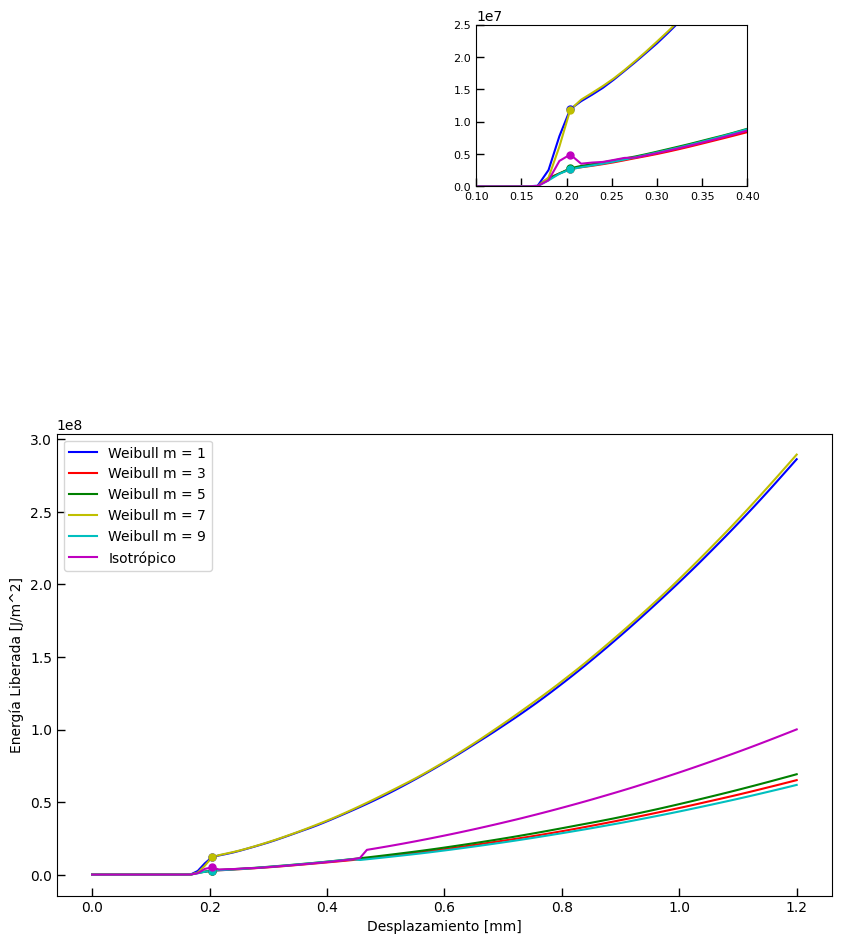

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Lee los archivos Excel
df_m1 = pd.read_excel('/content/database_iso_weibull_m1.xlsx')
df_m3 = pd.read_excel('/content/database_iso_weibull_m3.xlsx')
df_m5 = pd.read_excel('/content/database_iso_weibull_m5.xlsx')
df_m7 = pd.read_excel('/content/database_iso_weibull_m7.xlsx')
df_m9 = pd.read_excel('/content/database_iso_weibull_m9.xlsx')
df_isotropico = pd.read_excel('/content/database_iso_final_homogeneo.xlsx')

# Crear la figura principal
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las curvas principales
colors = ['b', 'r', 'g', 'y', 'c', 'm']
datasets = [df_m1, df_m3, df_m5, df_m7, df_m9, df_isotropico]
labels = ['Weibull m = 1', 'Weibull m = 3', 'Weibull m = 5', 'Weibull m = 7', 'Weibull m = 9', 'Isotrópico']

for df, color, label in zip(datasets, colors, labels):
    ax.plot(df['Displacement (mm)'], df['J-integral (J/m^2)'], linestyle='-', color=color, label=label)

# Añadir marcadores en el desplazamiento de interés (0.204 mm)
displacement_target = 0.204
for df, color in zip(datasets, colors):
    index = df['Displacement (mm)'].sub(displacement_target).abs().idxmin()
    ax.plot(df['Displacement (mm)'][index], df['J-integral (J/m^2)'][index], marker='o', markersize=5, color=color)

# Configurar etiquetas del gráfico principal
ax.set_xlabel('Desplazamiento [mm]')
ax.set_ylabel('Energía Liberada [J/m^2]')
ax.grid(False)
ax.legend()
plt.tick_params(direction='in', length=6, width=1, colors='k', grid_color='k', grid_alpha=0.5)
# Crear un subgráfico (zoom) en la posición deseada
axins = inset_axes(ax, width="35%", height="35%", loc="upper right", bbox_to_anchor=(-0.1, 0.9, 1, 1), bbox_transform=ax.transAxes)

# Establecer límites del zoom en el área de interés
axins.set_xlim(0.1, 0.4)  # Asegúrate de que estos límites incluyan datos
axins.set_ylim(0.0, 0.25e8)  # Ajusta según los valores de 'J-integral (J/m^2)'

# Graficar las curvas en el subgráfico
for df, color in zip(datasets, colors):
    axins.plot(df['Displacement (mm)'], df['J-integral (J/m^2)'], linestyle='-', color=color)

# Añadir los marcadores también en el subgráfico
for df, color in zip(datasets, colors):
    index = df['Displacement (mm)'].sub(displacement_target).abs().idxmin()
    axins.plot(df['Displacement (mm)'][index], df['J-integral (J/m^2)'][index], marker='o', markersize=5, color=color)

# Configurar el subgráfico
axins.tick_params(axis='both', which='both', labelsize=8)
axins.grid(False)



plt.tick_params(direction='in', length=6, width=1, colors='k', grid_color='k', grid_alpha=0.5)
plt.show()

